# Compare Result Equity 

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt
from util.load_data import load_data

## Load result strategy

In [3]:
strategy = {}

### Data XAUUSD

In [4]:
XAUUSD = load_data()

###  EURUSD

In [88]:
EURUSD = {}
file = 'EURUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [89]:
EURUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
EURUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
EURUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
EURUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

In [90]:
strategy['XAUUSD_EURUSD'] = EURUSD

###  BRENTCMDUSD

In [5]:
BRENTCMDUSD = {}
file = 'BRENTCMDUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [6]:
BRENTCMDUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
BRENTCMDUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
BRENTCMDUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
BRENTCMDUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

In [7]:
strategy['XAUUSD_BRENTCMDUSD'] = BRENTCMDUSD

###  XAGUSD

In [8]:
XAGUSD = {}
file = 'XAGUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [9]:
XAGUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
XAGUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
XAGUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
XAGUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

#### Reindex

In [10]:
XAGUSD['D1'] = XAGUSD['D1'].reindex(BRENTCMDUSD['D1'].index, method='ffill')  # fill forward
XAGUSD['H4'] = XAGUSD['H4'].reindex(BRENTCMDUSD['H4'].index, method='ffill')  # fill forward
XAGUSD['H1'] = XAGUSD['H1'].reindex(BRENTCMDUSD['H1'].index, method='ffill')  # fill forward
XAGUSD['M30'] = XAGUSD['M30'].reindex(BRENTCMDUSD['M30'].index, method='ffill')  # fill forward

In [11]:
strategy['XAUUSD_XAGUSD'] = XAGUSD

### Buy and Hold

In [115]:
benchmark = {}

In [116]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

In [117]:
benchmark['D1'] = benchmark['D1'].reindex(
    EURUSD['D1'].index, method='ffill')  # fill forward
benchmark['H4'] = benchmark['H4'].reindex(
    EURUSD['H4'].index, method='ffill')  # fill forward
benchmark['H1'] = benchmark['H1'].reindex(
    EURUSD['H1'].index, method='ffill')  # fill forward
benchmark['M30'] = benchmark['M30'].reindex(
    EURUSD['M30'].index, method='ffill')  # fill forward

In [118]:
strategy['Buy and Hold'] = benchmark

## Shown Result

### TF D1

In [14]:
TF = 'D1'

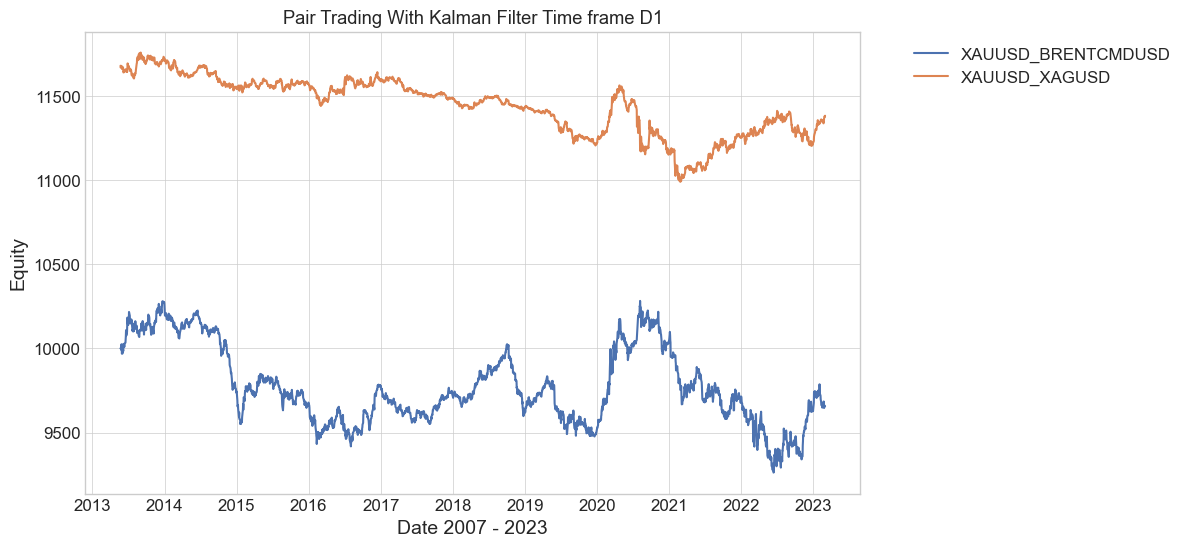

In [15]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    XAGUSD['D1'].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
          
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H4

In [121]:
TF = 'H4'

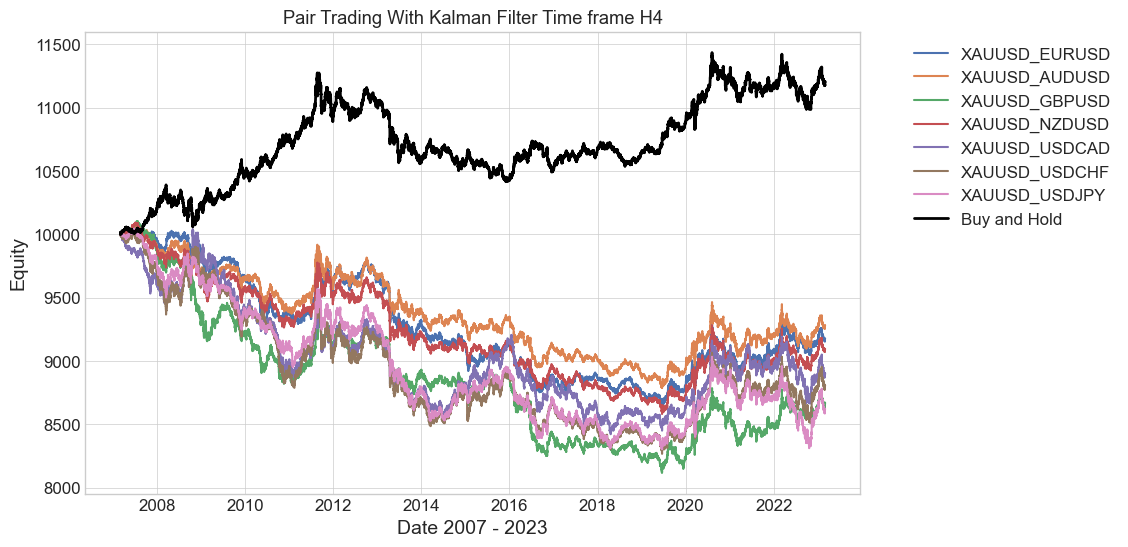

In [122]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
       
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H1

In [123]:
TF = 'H1'

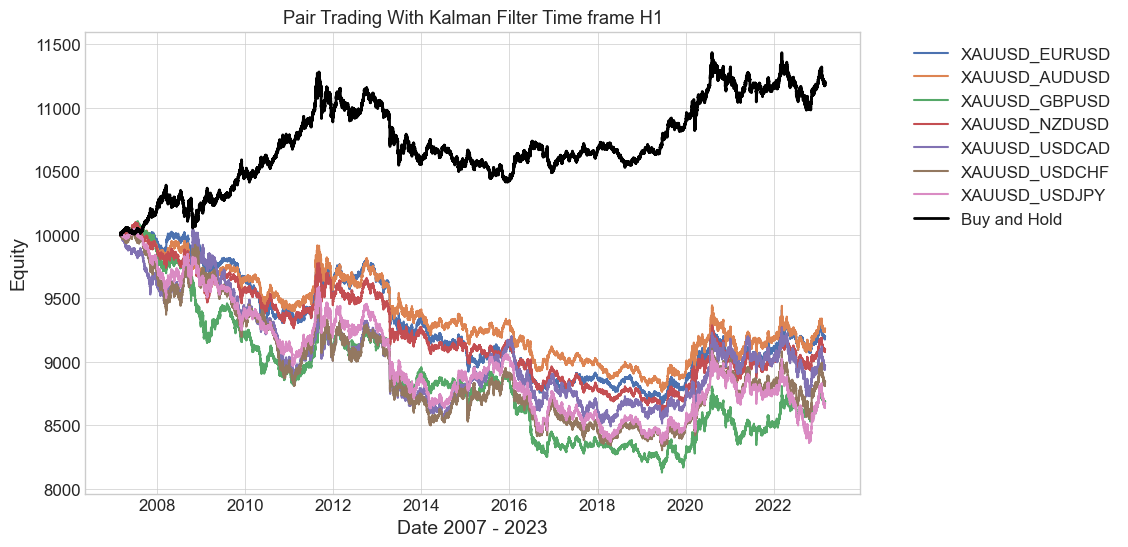

In [124]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
       
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF M30

In [125]:
TF = 'M30'

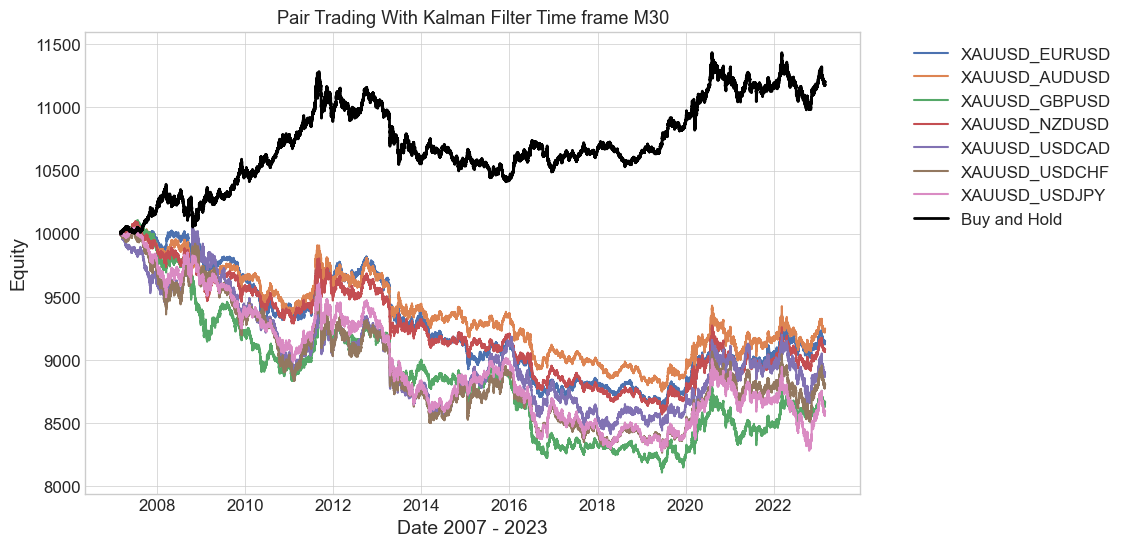

In [126]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
          
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()